In [20]:
import panel as pn
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
import matplotlib.pyplot as plt
import tifffile

from bokeh.plotting import figure, show
from bokeh.events import Tap, SelectionGeometry
from bokeh.models import BoxEditTool, ColumnDataSource

In [21]:
orig_image = tifffile.imread("1B_C1.tif")

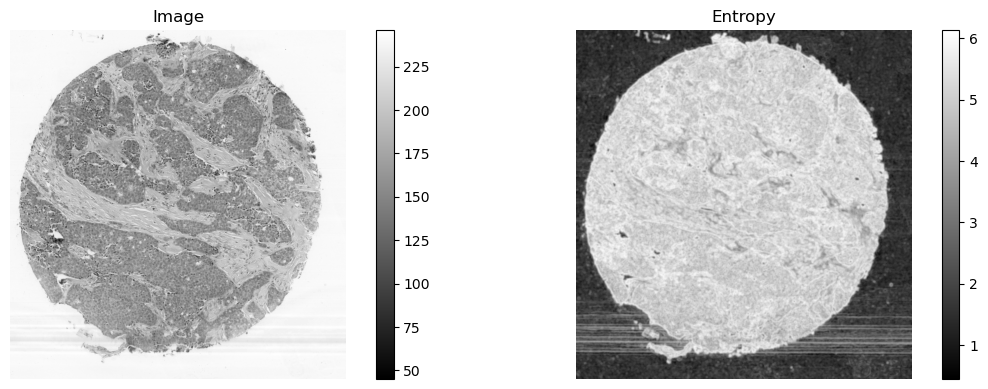

In [22]:
image = img_as_ubyte(orig_image[2])

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 4),
                               sharex=True, sharey=True)

img0 = ax0.imshow(image, cmap=plt.cm.gray)
ax0.set_title("Image")
ax0.axis("off")
fig.colorbar(img0, ax=ax0)

img1 = ax1.imshow(entropy(image, disk(5)), cmap='gray')
ax1.set_title("Entropy")
ax1.axis("off")
fig.colorbar(img1, ax=ax1)

fig.tight_layout()

In [23]:
max(image[1])

243

In [24]:
pn.extension()

In [15]:
mpl_pane = pn.pane.Matplotlib(fig, format='svg', sizing_mode='scale_both')
# pn.Row(mpl_pane).servable()

In [16]:
image_button = pn.widgets.Button(name='Load Image', button_type='primary') #panel widget
image_widget = pn.panel(figure(title='Display')) #bokeh wrapper
analyze_button = pn.widgets.Button(name='Run Texture Analysis', button_type='primary')
analyze_widget = pn.panel(figure(title='Entropy'))

In [26]:
def on_image_button_clicked(b):
    C, X, Y = orig_image.shape
    image = img_as_ubyte(orig_image[0])
    p = figure(title="Display", x_range=(0,X), y_range=(0, Y))
    p.image(image=[image],x=0, y=0, dw = X, dh = Y)
    image_widget.object = p

def on_analyze_button_clicked(b):
    C, X, Y = orig_image.shape
    image = img_as_ubyte(orig_image[0])
    analysis= entropy(image, disk(5))
    p = figure(title="Entropy", x_range=(0,X), y_range=(0, Y))
    p.image(image=[analysis],x=0, y=0, dw = X, dh = Y)
    analyze_widget.object = p
    pass

In [27]:
image_button.on_click(on_image_button_clicked)
analyze_button.on_click(on_analyze_button_clicked)

Watcher(inst=Button(button_type='primary', name='Run Texture Analysis'), cls=<class 'panel.widgets.button.Button'>, fn=<function on_analyze_button_clicked at 0x000002275BE258B0>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

In [28]:
display_app = pn.Column(
    pn.Row(
        pn.Column (
            image_button, 
            analyze_button
        ),
            image_widget
    ),
    analyze_widget
)
display_app.servable()

Column
    [0] Row
        [0] Column
            [0] Button(button_type='primary', clicks=1, name='Load Image')
            [1] Button(button_type='primary', name='Run Texture Analysis')
        [1] Bokeh(figure, align='auto', height=600, width=600)
    [1] Bokeh(figure)